In [0]:
import torch.nn as nn
import torch.nn.functional as F

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import torch
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms, utils

# Ignore warnings
import warnings
warnings.filterwarnings("ignore")


In [6]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)


testset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)


Files already downloaded and verified
Files already downloaded and verified


In [0]:
trainloader = torch.utils.data.DataLoader(trainset, batch_size=10, shuffle=True)
testloader = torch.utils.data.DataLoader(testset, batch_size=10, shuffle=False)


classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

foreground_classes = {'horse','ship', 'truck'}

background_classes = {'plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog'}

# print(type(foreground_classes))

In [0]:
dataiter = iter(trainloader)
background_data=[]
background_label=[]
foreground_data=[]
foreground_label=[]
batch_size=10
for i in range(5000):
    images, labels = dataiter.next()
    for j in range(batch_size):
        if(classes[labels[j]] in background_classes):
            img = images[j].tolist()
            background_data.append(img)
            background_label.append(labels[j])
        else:
            img = images[j].tolist()
            foreground_data.append(img)
            foreground_label.append(labels[j])
            
foreground_data = torch.tensor(foreground_data)
foreground_label = torch.tensor(foreground_label)
background_data = torch.tensor(background_data)
background_label = torch.tensor(background_label)
    

In [0]:
# print(foreground_data.size())
# print(background_data.size())
# torch.save(foreground_data,'foreground_data.pt')
# torch.save(background_data,'background_data.pt')
# torch.save(foreground_label,'foreground_label.pt')
# torch.save(background_label,'background_label.pt')
# torch.load()

In [0]:
# torch.load('foreground_data.pt')
# # print(foreground_data.size())
# # print(background_data.size())

In [0]:

# foreground_data = torch.load('foreground_data.pt')
# background_data = torch.load('background_data.pt')
# foreground_label = torch.load('foreground_label.pt')
# background_label = torch.load('background_label.pt')


In [0]:
def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

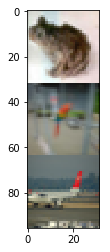

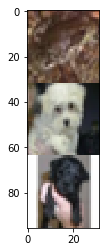

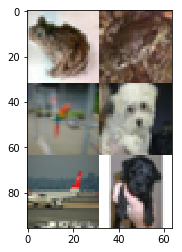

torch.Size([3, 96, 32])


In [12]:
img1 = torch.cat((background_data[0],background_data[1],background_data[2]),1)
imshow(img1)
img2 = torch.cat((background_data[27],background_data[3],background_data[43]),1)
imshow(img2)
img3 = torch.cat((img1,img2),2)
imshow(img3)
print(img2.size())


In [0]:
def create_mosaic_img(bg_idx,fg_idx,fg): 
  """
  bg_idx : list of indexes of background_data[] to be used as background images in mosaic
  fg_idx : index of image to be used as foreground image from foreground data
  fg : at what position/index foreground image has to be stored out of 0-8
  """
  image_list=[]
  j=0
  for i in range(9):
      if i != fg:
          image_list.append(background_data[bg_idx[j]].type("torch.DoubleTensor"))
          j+=1
      else: 
          image_list.append(foreground_data[fg_idx].type("torch.DoubleTensor"))
          label = foreground_label[fg_idx]-7  # minus 7 because our fore ground classes are 7,8,9 but we have to store it as 0,1,2
  #image_list = np.concatenate(image_list ,axis=0)
  image_list = torch.stack(image_list) 
  return image_list,label

In [0]:
desired_num = 30000
mosaic_list_of_images =[]        #list of mosaic images, each mosaic image is saved as laist of 9 images
fore_idx =[]                   #list of indexes at which foreground image is present in a mosaic image                
mosaic_label=[]                # label of mosaic image = foreground class present in that mosaic
for i in range(desired_num):
    bg_idx = np.random.randint(0,35000,8)
    fg_idx = np.random.randint(0,15000)
    fg = np.random.randint(0,9)
    fore_idx.append(fg)
    image_list,label = create_mosaic_img(bg_idx,fg_idx,fg)
    mosaic_list_of_images.append(image_list)
    mosaic_label.append(label)



In [15]:
#imshow(mosaic_list_of_images[0][4])
print(mosaic_list_of_images[0])
# print(classes[mosaic_label[13]+7]) # add 7 as we had subtracted 7 while saving
# print(fore_idx[13])
# imshow(mosaic_list_of_images[13][2])
# print(type(mosaic_list_of_images[1][0]))
# print(mosaic_label)

tensor([[[[ 0.2078,  0.2078,  0.1294,  ...,  0.2314,  0.1922,  0.1686],
          [ 0.2000,  0.2235, -0.2549,  ...,  0.2314,  0.2078,  0.2078],
          [ 0.1922,  0.2157, -0.5608,  ...,  0.2471,  0.2314,  0.2157],
          ...,
          [ 0.2471,  0.2471,  0.2549,  ...,  0.2941,  0.2627,  0.2235],
          [ 0.2392,  0.2471,  0.2235,  ...,  0.2549,  0.2549,  0.2392],
          [ 0.2000,  0.2392,  0.2235,  ...,  0.2392,  0.2549,  0.2314]],

         [[ 0.0275,  0.0275, -0.0353,  ...,  0.0510,  0.0118, -0.0196],
          [ 0.0275,  0.0431, -0.3725,  ...,  0.0510,  0.0275,  0.0196],
          [ 0.0353,  0.0745, -0.6314,  ...,  0.0667,  0.0510,  0.0275],
          ...,
          [ 0.0667,  0.0667,  0.0745,  ...,  0.1137,  0.0824,  0.0431],
          [ 0.0588,  0.0667,  0.0431,  ...,  0.0745,  0.0745,  0.0588],
          [ 0.0275,  0.0588,  0.0431,  ...,  0.0588,  0.0667,  0.0431]],

         [[-0.2157, -0.2235, -0.2706,  ..., -0.1922, -0.2314, -0.2549],
          [-0.2157, -0.1922, -

In [0]:
class MosaicDataset(Dataset):
    """MosaicDataset dataset."""

    def __init__(self, mosaic_list_of_images, mosaic_label):
        """
        Args:
            csv_file (string): Path to the csv file with annotations.
            root_dir (string): Directory with all the images.
            transform (callable, optional): Optional transform to be applied
                on a sample.
        """
        self.mosaic = mosaic_list_of_images
        self.label = mosaic_label

    def __len__(self):
        return len(self.label)

    def __getitem__(self, idx):
      return self.mosaic[idx] , self.label[idx]
      
msd = MosaicDataset(mosaic_list_of_images,mosaic_label)
train_loader = DataLoader( msd,batch_size=100,shuffle=True)

In [0]:
import torch.nn as nn
import torch.nn.functional as F

class Module1(nn.Module):
    def __init__(self):
        super(Module1, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)
        self.fc4 = nn.Linear(10,1)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16 * 5 * 5)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = self.fc4(x)
        return x
# net = Module1()
# print(net.parameters)

In [0]:
class Module2(nn.Module):
    def __init__(self):
        super(Module2, self).__init__()
        self.module1 = Module1().double()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)
        self.fc4 = nn.Linear(10,3)

    def forward(self,z):  #z batch of list of 9 images
        y = torch.zeros([100,3, 32,32], dtype=torch.float64)
        x = torch.zeros([100,9],dtype=torch.float64)
        #print(z[:,0,:,:,:])
        for i in range(9):
            x[:,i] = self.module1.forward(z[:,i])[:,0]
            #print(x.shape)
            
#         print("x=",x)
#         print("its softmax", torch.softmax(x, dim=0))
        
#         print(x[:,0].shape,z[:,0].shape)
    
        x1 = x[:,0]
        torch.mul(x1[:,None,None,None],z[:,0])
        for i in range(9):
            #y = y + 
          x1 = x[:,i]
          y = y + torch.mul(x1[:,None,None,None],z[:,i])

#         imshow(y.detach())
         
        
        y = self.pool(F.relu(self.conv1(y)))
        y = self.pool(F.relu(self.conv2(y)))
        y = y.view(-1, 16 * 5 * 5)
        
        y = F.relu(self.fc1(y))
        y = F.relu(self.fc2(y))
        y = F.relu(self.fc3(y))
        y = self.fc4(y)
        return y
    
fore_net = Module2().double()
# print(fore_net.parameters)

In [37]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(fore_net.parameters(), lr=0.01, momentum=0.9)
for epoch in range(50):  # loop over the dataset multiple times

    running_loss = 0.0
    cnt=0
    batch = 250
    iteration = desired_num // batch
    for i, data in  enumerate(train_loader):
    
        inputs , labels = data
        
        
        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = fore_net(inputs)
#         print(outputs.shape,labels.shape , torch.argmax(outputs))
        loss = criterion(outputs, labels) 
        loss.backward()
        optimizer.step()
#         print(loss.item())
        # print statistics
        running_loss += loss.item()
        if cnt % 40 == 39:    # print every 2000 mini-batches
            print('[%d, %5d] loss: %.3f' %(epoch + 1, cnt + 1, running_loss / 40))
            running_loss = 0.0
        cnt=cnt+1
#     print('[%d, %5d] loss: %.3f' %(epoch + 1, cnt , running_loss/cnt))
#     print(running_loss)
print('Finished Training')

[1,    40] loss: 1.105
[1,    80] loss: 1.099
[1,   120] loss: 1.099
[1,   160] loss: 1.099
[1,   200] loss: 1.098
[1,   240] loss: 1.099
[1,   280] loss: 1.098
[2,    40] loss: 1.098
[2,    80] loss: 1.099
[2,   120] loss: 1.099
[2,   160] loss: 1.099
[2,   200] loss: 1.099
[2,   240] loss: 1.099
[2,   280] loss: 1.099
[3,    40] loss: 1.099
[3,    80] loss: 1.099
[3,   120] loss: 1.099
[3,   160] loss: 1.099
[3,   200] loss: 1.099
[3,   240] loss: 1.098
[3,   280] loss: 1.099
[4,    40] loss: 1.098
[4,    80] loss: 1.098
[4,   120] loss: 1.098
[4,   160] loss: 1.097
[4,   200] loss: 1.097
[4,   240] loss: 1.095
[4,   280] loss: 1.094
[5,    40] loss: 1.087
[5,    80] loss: 1.081
[5,   120] loss: 1.078
[5,   160] loss: 1.081
[5,   200] loss: 1.075
[5,   240] loss: 1.083
[5,   280] loss: 1.071
[6,    40] loss: 1.071
[6,    80] loss: 1.070
[6,   120] loss: 1.070
[6,   160] loss: 1.061
[6,   200] loss: 1.067
[6,   240] loss: 1.061
[6,   280] loss: 1.061
[7,    40] loss: 1.052
[7,    80] 

In [0]:
desired_num = 10000
test_images =[]        #list of mosaic images, each mosaic image is saved as laist of 9 images
fore_idx =[]                   #list of indexes at which foreground image is present in a mosaic image                
test_label=[]                # label of mosaic image = foreground class present in that mosaic
for i in range(desired_num):
    bg_idx = np.random.randint(0,35000,8)
    fg_idx = np.random.randint(0,15000)
    fg = np.random.randint(0,9)
    fore_idx.append(fg)
    image_list,label = create_mosaic_img(bg_idx,fg_idx,fg)
    test_images.append(image_list)
    test_label.append(label)

In [0]:
# class MosaicDataset(Dataset):
#     """MosaicDataset dataset."""

#     def __init__(self, mosaic_list_of_images, mosaic_label):
#         """
#         Args:
#             csv_file (string): Path to the csv file with annotations.
#             root_dir (string): Directory with all the images.
#             transform (callable, optional): Optional transform to be applied
#                 on a sample.
#         """
#         self.mosaic = mosaic_list_of_images
#         self.label = mosaic_label

#     def __len__(self):
#         return len(self.label)

#     def __getitem__(self, idx):
#       return self.mosaic[idx] , self.label[idx]
      
test_data = MosaicDataset(test_images,test_label)
test_loader = DataLoader( test_data,batch_size=100,shuffle=True)

In [40]:
correct = 0
total = 0
with torch.no_grad():
    for data in test_loader:
        images, labels = data
        outputs = fore_net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the 10000 test images: %d %%' % (
    100 * correct / total))

Accuracy of the network on the 10000 test images: 85 %


In [30]:
correct = 0
total = 0
with torch.no_grad():
    for data in train_loader:
        images, labels = data
        outputs = fore_net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the 10000 test images: %d %%' % (
    100 * correct / total))

Accuracy of the network on the 10000 test images: 89 %
